In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from scipy.stats import ttest_ind

In [3]:
filename = "resultaty.csv"

In [4]:
df = pd.read_csv(filename)
df = df.drop(columns='Unnamed: 0')

In [9]:
df.itertuples()

In [5]:
grouped = df.groupby(by=["layer_size","momentum_value","feature_number"])

In [13]:
grouped.mean().sort_values("score",ascending=False).head(10).reset_index()

,layer_size,momentum_value,feature_number
0,350.0,0.9,17.0
1,350.0,0.9,44.0
2,350.0,0.9,52.0
3,350.0,0.9,51.0
4,350.0,0.9,48.0
5,350.0,0.9,15.0
6,200.0,0.9,32.0
7,350.0,0.9,42.0
8,200.0,0.9,56.0
9,200.0,0.9,41.0


In [47]:
def get_n_best_params(grouped_df:pd.DataFrame,n:int=10):
    params = pd.Index(["layer_size","momentum_value","feature_number"])
    n_best = grouped_df.mean().sort_values("score",ascending=False).head(n).reset_index()
    return list(n_best[params].itertuples(index=False,name=None))

In [14]:
def get_scores_for_feature_number(grouped_df, feature_number:int,layer_sizes=(100,200,350),momentums=(0,0.9)):
    scores = []
    lists = grouped.score.apply(list)
    for layer_size in layer_sizes:
        for momentum in momentums:
            scores.append(lists[layer_size,momentum,feature_number])
    return scores

In [6]:
listy = grouped.score.apply(list)

In [16]:
layer_sizes = [100,200,350]
momentums = [0,0.9]
features = [1,2,3]
get_scores_for_feature_number(grouped,2)

[[0.2926829268292683,
  0.4,
  0.2926829268292683,
  0.22,
  0.1574279379157428,
  0.22,
  0.2926829268292683,
  0.25555555555555554,
  0.3880266075388025,
  0.37333333333333335],
 [0.4079822616407982,
  0.4733333333333333,
  0.4390243902439024,
  0.25555555555555554,
  0.4789356984478936,
  0.25555555555555554,
  0.4478935698447893,
  0.25555555555555554,
  0.4722838137472284,
  0.44222222222222224],
 [0.3436807095343681,
  0.34,
  0.2549889135254989,
  0.15777777777777774,
  0.2815964523281597,
  0.4555555555555556,
  0.3614190687361419,
  0.31555555555555553,
  0.4301552106430155,
  0.2088888888888889],
 [0.4434589800443459,
  0.4488888888888889,
  0.3702882483370288,
  0.3844444444444444,
  0.4279379157427938,
  0.4577777777777778,
  0.44124168514412415,
  0.4511111111111111,
  0.4678492239467849,
  0.4555555555555556],
 [0.1574279379157428,
  0.3111111111111111,
  0.2549889135254989,
  0.22,
  0.32815964523281604,
  0.33111111111111113,
  0.2195121951219512,
  0.2977777777777777,


In [13]:
layer_size = 100
momentum = 0.9


listy[100,0,3]

[0.3680709534368071,
 0.3088888888888889,
 0.4656319290465632,
 0.3022222222222222,
 0.37694013303769397,
 0.2688888888888889,
 0.2195121951219512,
 0.15777777777777774,
 0.35476718403547675,
 0.2911111111111111]

In [9]:
n = 20
scores = []
for params in get_n_best_params(grouped,n):
    scores.append(list(grouped.get_group(params)["score"]))
    
scores

NameError: name 'get_n_best_params' is not defined

In [76]:
t_statistic = np.zeros((n,n))
p_value = np.zeros((n,n))

for i in range(n):
    for j in range(n):
        t_statistic[i, j], p_value[i, j] = ttest_ind(scores[i], scores[j])
 
print("t-statistic:\n", t_statistic, "\n\np-value:\n", p_value)

t-statistic:
 [[ 0.00000000e+00  6.19962607e-01  5.46639129e-01  9.00709903e-01
   1.63068296e+00  1.33404522e+00  9.31478950e-01  1.02980868e+00
   9.52193585e-01  1.55007882e+00  1.88113133e+00  1.64443944e+00
   1.92600651e+00  1.23570594e+00  1.70460849e+00  1.47003185e+00
   2.40762743e+00  1.66746401e+00  1.63782744e+00  2.35420738e+00]
 [-6.19962607e-01  0.00000000e+00  5.19374896e-02  3.42492244e-01
   5.32170867e-01  4.70620603e-01  4.04460750e-01  4.54839748e-01
   5.05151417e-01  8.35780590e-01  9.80955927e-01  8.98232486e-01
   1.14461622e+00  8.11272701e-01  1.07225550e+00  9.62294984e-01
   1.42363219e+00  1.10042731e+00  1.08856363e+00  1.47289880e+00]
 [-5.46639129e-01 -5.19374896e-02  0.00000000e+00  2.48684869e-01
   3.39900781e-01  3.15916098e-01  3.08633970e-01  3.45010011e-01
   4.15151252e-01  6.50898431e-01  7.35827942e-01  6.98057497e-01
   9.04363724e-01  7.03978167e-01  8.81548298e-01  8.18938994e-01
   1.09410729e+00  9.26924515e-01  9.21733777e-01  1.1640132

In [77]:
alpha = .05
significance = np.zeros((n, n))
significance[p_value <= alpha] = 1
#significance_table = tabulate(np.concatenate(
 #   (names_column, significance), axis=1), headers)
print("Statistical significance (alpha = 0.05):\n", significance)

Statistical significance (alpha = 0.05):
 [[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0.

In [78]:
advantage = np.zeros((n, n))
advantage[t_statistic > 0] = 1
#advantage_table = tabulate(np.concatenate(
 #   (names_column, advantage), axis=1), headers)
print("Advantage:\n", advantage)

Advantage:
 [[0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.

In [79]:
stat_better = significance * advantage
# stat_better_table = tabulate(np.concatenate(
#     (names_column, stat_better), axis=1), headers)
print("Statistically significantly better:\n", stat_better)



Statistically significantly better:
 [[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0

In [42]:
y1 = []
y2 = []
y3 = []
for i in range(1,58):
    y1.append(grouped.get_group((100,0.9,i)).mean()["score"])
    y2.append(grouped.get_group((200,0.9,i)).mean()["score"])
    y3.append(grouped.get_group((350,0.9,i)).mean()["score"])
    

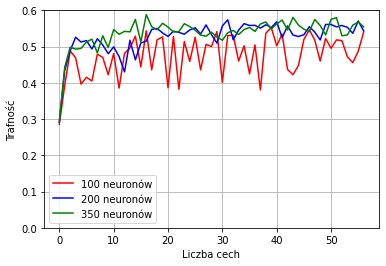

In [27]:

plt.ylim([0,0.6])
plt.plot(y1,'r',label="100 neuronów")
plt.plot(y2,'b',label="200 neuronów")
plt.plot(y3,'g',label="350 neuronów")
plt.ylabel("Trafność")
plt.xlabel("Liczba cech")
plt.legend()
plt.grid(True)

#plt.title("")
#plt.show()

plt.savefig("zmomentum.pdf")

No handles with labels found to put in legend.
Exception in Tkinter callback
Traceback (most recent call last):
  File "C:\Program Files\Python37\lib\tkinter\__init__.py", line 1705, in __call__
    return self.func(*args)
  File "C:\Program Files\Python37\lib\tkinter\__init__.py", line 749, in callit
    func(*args)
  File "d:\studia\vii semestr\mstwm2\venv\lib\site-packages\matplotlib\backends\_backend_tk.py", line 253, in idle_draw
    self.draw()
  File "d:\studia\vii semestr\mstwm2\venv\lib\site-packages\matplotlib\backends\backend_tkagg.py", line 9, in draw
    super(FigureCanvasTkAgg, self).draw()
  File "d:\studia\vii semestr\mstwm2\venv\lib\site-packages\matplotlib\backends\backend_agg.py", line 407, in draw
    self.figure.draw(self.renderer)
  File "d:\studia\vii semestr\mstwm2\venv\lib\site-packages\matplotlib\backend_bases.py", line 1544, in _draw
    def _draw(renderer): raise Done(renderer)
matplotlib.backend_bases._get_renderer.<locals>.Done: <matplotlib.backends.backen

TypeError: 'bool' object is not callable

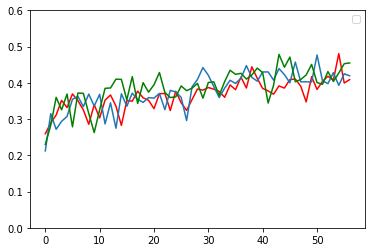

In [228]:
plt.ylim([0,0.6])
plt.legend()
plt.plot(y1,'r')
plt.plot(y2)
plt.plot(y3,'g')
plt.grid(True)
plt.show()


In [187]:
a = np.loadtxt("best_matrix.txt")
a

array([[  0.,   6.,  12.,   8.,   8.],
       [  0.,  17.,  21.,  15.,  18.],
       [  0.,   3.,  93.,   5.,  14.],
       [  0.,   1.,   0., 122.,   8.],
       [  0.,  10.,   6.,  39.,  44.]])